                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Mean Absolute Error (MAE): 35.77793308273659
Mean Squared Error (MSE): 1840.1524421549263
Root Mean Squared Error (RMSE): 42.89699805528269


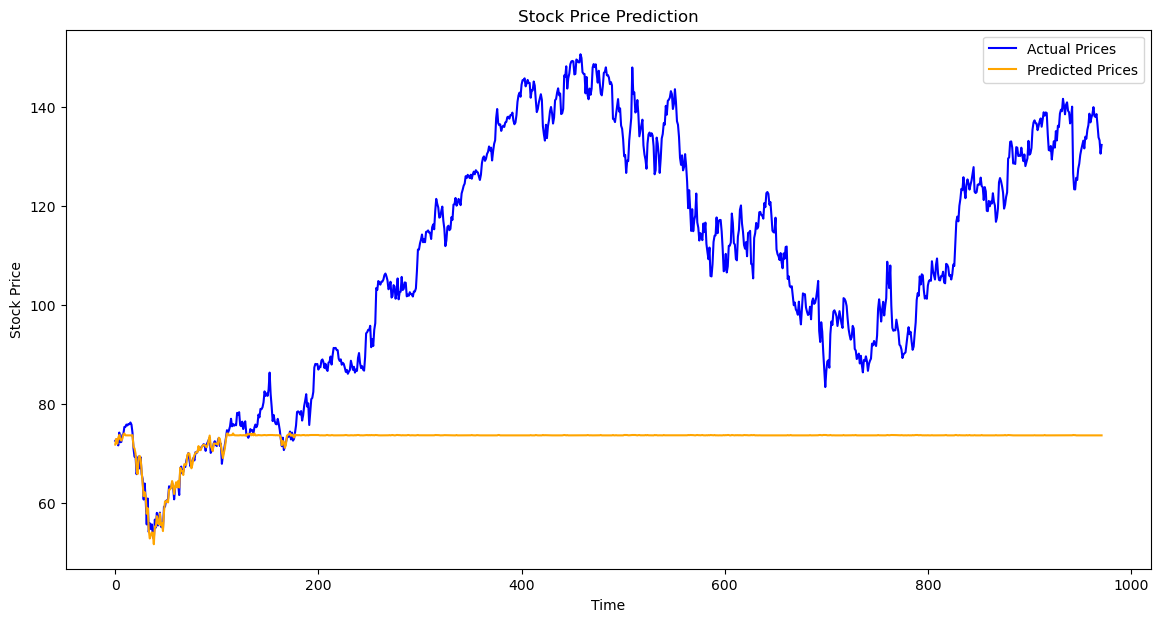

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Load Dataset
data = pd.read_csv(r"D:\Machine_Learning\archive\GOOG.csv") 
# Preview Data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
print(data.head())
print(data.isnull().sum())  # Check for missing values


# Feature Engineering
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Close']

# Scaling Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Model Initialization
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the Model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_e
rror(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='orange')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()